# Assignment 1 Code - Group 49

## Load Data

In [1]:
import numpy as np
import pandas as pd
import os
import timeit
import time
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10)

np.random.seed(2022)

['train.csv']


### load librarys

In [2]:
#Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score 

#Logistic regression
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter

#svm
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Random Forest
from onedal.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

#Ensemble
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

In [3]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train/train.csv')

In [4]:
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8


In [5]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()
# Selecting output lable
data_train_label = data_train_df.label.to_numpy()

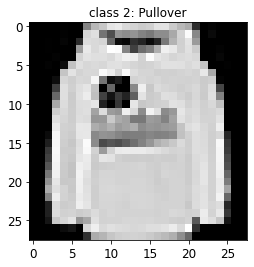

In [6]:
# import matplotlib.pyplot as plt
data_train_feature_image = data_train_feature.reshape((data_train_feature.shape[0], 
28, 28))
plt.imshow(data_train_feature_image[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

In [7]:
# test_input.csv includes 5000 samples used for label prediction. Test samples, do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv')

In [8]:
data_test_df.head()

,id,v1,v2,v3,v4,...,v780,v781,v782,v783,v784
0,0,0,0,0,0,...,0,0,0,0,0
1,1,0,0,0,0,...,0,0,0,0,0
2,2,0,0,0,0,...,0,0,0,0,0
3,3,0,0,0,0,...,0,0,0,0,0
4,4,0,0,0,0,...,0,0,0,0,0


In [9]:
data_test_feature = data_test_df.loc[:, "v1":"v784"].to_numpy()

## Data Prepocessing

### Data Preprocessing（Normalization）

In [10]:
scaler = MinMaxScaler() # creating an object
scaler.fit(data_train_feature) # calculate min and max value of the training data
data_train_feature_norm = scaler.transform(data_train_feature) # apply normalization to the training set
scaler.fit(data_test_feature) 
data_test_feature_norm = scaler.fit_transform(data_test_feature)

### Data Seperation

In [11]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(data_train_feature_norm, data_train_label, test_size=0.2, random_state=2022)

### PCA Analysis

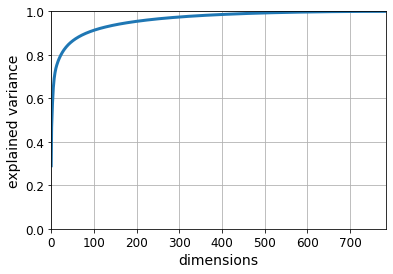

In [12]:
# Perform PCA without reducing dimensionality
pca = PCA()
pca.fit(data_train_feature)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance vs number of dimensions

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

### PCA

In [13]:
pca = PCA(0.95).fit(X_train_norm)
X_train_norm_reduced = pca.transform(X_train_norm)
X_test_norm_reduced = pca.transform(X_test_norm)
data_train_feature_norm_reduced = pca.transform(data_train_feature_norm)
data_test_feature_norm_reduced = pca.transform(data_test_feature_norm)

### Data Preprocessing(Standardization)

In [14]:
scaler_standard = StandardScaler()
data_train_feature_standard = scaler_standard.fit_transform(data_train_feature)
data_test_feature_standard = scaler_standard.fit_transform(data_test_feature)

### Split of Data & PCA

In [15]:
pca = PCA(0.95).fit(data_train_feature_standard)

In [16]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(data_train_feature_standard, data_train_label, test_size=0.2, random_state=2022)
X_train_std_reduced = pca.transform(X_train_std)
X_test_std_reduced = pca.transform(X_test_std)
data_train_feature_std_reduced = pca.transform(data_train_feature_standard)
data_test_feature_std_reduced = pca.transform(data_test_feature_standard)

## KNN Classification

### KNN with 3 Neighbors 

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)

# #Normalizatin
knn.fit(X_train_norm, y_train_norm)
print("3 Neighbors Classifier for normalised data - accuracy on test set: {:.4f}".format(knn.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
knn.fit(X_train_norm_reduced, y_train_norm)
print("3 Neighbors Classifier for normalised data(PCA)- accuracy on test set: {:.4f}".format(knn.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
knn.fit(X_train_std, y_train_std)
print("3 Neighbors Classifier for standardlized data - accuracy on test set: {:.4f}".format(knn.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
knn.fit(X_train_std_reduced, y_train_std)
print("3 Neighbors Classifier for standardlized data(PCA)- accuracy on test set: {:.4f}".format(knn.score(X_test_std_reduced, y_test_std)))

3 Neighbors Classifier for normalised data - accuracy on test set: 0.8410
3 Neighbors Classifier for normalised data(PCA)- accuracy on test set: 0.8475
3 Neighbors Classifier for standardlized data - accuracy on test set: 0.8412
3 Neighbors Classifier for standardlized data(PCA)- accuracy on test set: 0.8492


### Grid search with cross-validation for selection of number of neighbors and distance calculation method

In [18]:
param_grid = {'n_neighbors': [1, 3, 5, 11, 15],
              'p': [1, 2]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,
                          return_train_score=True)


grid_search.fit(data_train_feature_norm, data_train_label)

print("Test set score: {:.2f}".format(grid_search.score(data_train_feature_norm, data_train_label)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [37]:
param_grid = {'n_neighbors': [4, 5, 6, 7, 8, 9, 10],
              'p': [1]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,
                          return_train_score=True)


grid_search.fit(data_train_feature_norm, data_train_label)

print("Test set score: {:.2f}".format(grid_search.score(data_train_feature_norm, data_train_label)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_neighbors': [4, 5, 6, 7, 8, 9, 10], 'p': [1]}
Test set score: 0.88
Best parameters: {'n_neighbors': 8, 'p': 1}
Best cross-validation score: 0.85
Best estimator:
KNeighborsClassifier(n_neighbors=8, p=1)


### Runtime 

In [20]:
start = timeit.default_timer()

knn_clf = KNeighborsClassifier(n_neighbors = 8, p = 1)
knn_clf.fit(data_train_feature_std_reduced, data_train_label)
y_pred_knn_clf = knn_clf.predict(data_test_feature_std_reduced)

stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  44.0380322


## Logistic Regression

### Liblinear Logistic Regression

### lbfgs Logistic Regression

In [21]:
simplefilter("ignore", category=ConvergenceWarning)

lr_lbfgs = LogisticRegression(solver="lbfgs", max_iter = 200)

# #Normalizatin
lr_lbfgs.fit(X_train_norm, y_train_norm)
print("Lbfgs Logistic Regression for normalised data - accuracy on test set: {:.4f}".format(lr_lbfgs.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
lr_lbfgs.fit(X_train_norm_reduced, y_train_norm)
print("Lbfgs Logistic Regression for normalised data(PCA)- accuracy on test set: {:.4f}".format(lr_lbfgs.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
lr_lbfgs.fit(X_train_std, y_train_std)
print("Lbfgs Logistic Regression for standardlized data - accuracy on test set: {:.4f}".format(lr_lbfgs.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
lr_lbfgs.fit(X_train_std_reduced, y_train_std)
print("Lbfgs Logistic Regression for standardlized data(PCA)- accuracy on test set: {:.4f}".format(lr_lbfgs.score(X_test_std_reduced, y_test_std)))

Lbfgs Logistic Regression for normalised data - accuracy on test set: 0.8508
Lbfgs Logistic Regression for normalised data(PCA)- accuracy on test set: 0.8527
Lbfgs Logistic Regression for standardlized data - accuracy on test set: 0.8363
Lbfgs Logistic Regression for standardlized data(PCA)- accuracy on test set: 0.8487


### Saga Logistic Regression

In [22]:
simplefilter("ignore", category=ConvergenceWarning)
lr_saga = LogisticRegression(solver="saga", max_iter = 200)

# #Normalizatin
lr_saga.fit(X_train_norm, y_train_norm)
print("Saga Logistic Regression for normalised data - accuracy on test set: {:.4f}".format(lr_saga.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
lr_saga.fit(X_train_norm_reduced, y_train_norm)
print("Saga Logistic Regression for normalised data(PCA)- accuracy on test set: {:.4f}".format(lr_saga.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
lr_saga.fit(X_train_std, y_train_std)
print("Saga Logistic Regression for standardlized data - accuracy on test set: {:.4f}".format(lr_saga.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
lr_saga.fit(X_train_std_reduced, y_train_std)
print("Saga Logistic Regression for standardlized data(PCA)- accuracy on test set: {:.4f}".format(lr_saga.score(X_test_std_reduced, y_test_std)))

Saga Logistic Regression for normalised data - accuracy on test set: 0.8515
Saga Logistic Regression for normalised data(PCA)- accuracy on test set: 0.8530
Saga Logistic Regression for standardlized data - accuracy on test set: 0.8548
Saga Logistic Regression for standardlized data(PCA)- accuracy on test set: 0.8523


### Grid search with cross-validation for selection of regulation strength and max number of iteratoin 

In [36]:
lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
max_iter = [50, 100, 200, 1000]
class_weight = ['balanced']
multi_class = ['multinomial']
solver = ['saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, max_iter = max_iter, solver=solver, multi_class = multi_class)

lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy',
                    verbose=1, n_jobs=-1, cv=6)
lr_cv.fit(X_train_std_reduced, y_train_std)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train_std_reduced, y_train_std)

print("Accuracy on trainig set:", lr_clf.score(X_train_std_reduced, y_train_std)*100)
print("Accuracy on test set:", lr_clf.score(X_test_std_reduced, y_test_std)*100)


Fitting 6 folds for each of 32 candidates, totalling 192 fits
Best parameters: {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 200, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Accuracy on trainig set: 86.3375
Accuracy on test set: 85.25


### Runtime

In [24]:
simplefilter("ignore", category=ConvergenceWarning)
lr_clf= LogisticRegression(penalty='l1', C=0.5, solver = 'saga',class_weight= 'balanced', multi_class='multinomial',max_iter = 100)

start = timeit.default_timer()

lr_clf.fit(data_train_feature_standard, data_train_label)
y_pred_lr_clf = lr_clf.predict(data_test_feature_standard)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  218.86339900000002


## SVM

### Linear SVM

In [25]:
lin_svm = SVC(kernel="linear")

# #Normalizatin
lin_svm.fit(X_train_norm, y_train_norm)
print("Linear SVM with normalised data - accuracy on test set: {:.4f}".format(lin_svm.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
lin_svm.fit(X_train_norm_reduced, y_train_norm)
print("Linear SVM with normalised data(PCA)- accuracy on test set: {:.4f}".format(lin_svm.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
lin_svm.fit(X_train_std, y_train_std)
print("Linear SVM with standardlized data - accuracy on test set: {:.4f}".format(lin_svm.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
lin_svm.fit(X_train_std_reduced, y_train_std)
print("Linear SVM with standardlized data(PCA)- accuracy on test set: {:.4f}".format(lin_svm.score(X_test_std_reduced, y_test_std)))

Linear SVM with normalised data - accuracy on test set: 0.8445
Linear SVM with normalised data(PCA)- accuracy on test set: 0.8568
Linear SVM with standardlized data - accuracy on test set: 0.8292
Linear SVM with standardlized data(PCA)- accuracy on test set: 0.8487


### SVM with polynomial kernel

In [26]:
poly_svm = SVC(kernel="poly", degree=2)#polynomial kernel with degree 2

# #Normalizatin
poly_svm.fit(X_train_norm, y_train_norm)
print("SVM with polynomial kernel for normalised data - accuracy on test set: {:.4f}".format(poly_svm.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
poly_svm.fit(X_train_norm_reduced, y_train_norm)
print("SVM with polynomial kernel for data(PCA)- accuracy on test set: {:.4f}".format(poly_svm.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
poly_svm.fit(X_train_std, y_train_std)
print("SVM with polynomial kernel for data - accuracy on test set: {:.4f}".format(poly_svm.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
poly_svm.fit(X_train_std_reduced, y_train_std)
print("SVM with polynomial kernel for data(PCA)- accuracy on test set: {:.4f}".format(poly_svm.score(X_test_std_reduced, y_test_std)))

SVM with polynomial kernel for normalised data - accuracy on test set: 0.8613
SVM with polynomial kernel for data(PCA)- accuracy on test set: 0.8767
SVM with polynomial kernel for data - accuracy on test set: 0.8750
SVM with polynomial kernel for data(PCA)- accuracy on test set: 0.8750


In [27]:
poly_svm = SVC(kernel="poly", degree=3)#polynomial kernel with degree 3

# #Normalizatin
poly_svm.fit(X_train_norm, y_train_norm)
print("SVM with polynomial kernel for normalised data - accuracy on test set: {:.4f}".format(poly_svm.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
poly_svm.fit(X_train_norm_reduced, y_train_norm)
print("SVM with polynomial kernel for data(PCA)- accuracy on test set: {:.4f}".format(poly_svm.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
poly_svm.fit(X_train_std, y_train_std)
print("SVM with polynomial kernel for data - accuracy on test set: {:.4f}".format(poly_svm.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
poly_svm.fit(X_train_std_reduced, y_train_std)
print("SVM with polynomial kernel for data(PCA)- accuracy on test set: {:.4f}".format(poly_svm.score(X_test_std_reduced, y_test_std)))

SVM with polynomial kernel for normalised data - accuracy on test set: 0.8493
SVM with polynomial kernel for data(PCA)- accuracy on test set: 0.8745
SVM with polynomial kernel for data - accuracy on test set: 0.8678
SVM with polynomial kernel for data(PCA)- accuracy on test set: 0.8675


In [28]:
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

poly_clf = SVC(kernel="rbf", degree = 2)
grid_search = GridSearchCV(poly_clf, param_grid, return_train_score=True, cv=6)


grid_search.fit(X_train_norm_reduced, y_train_norm)

print("Test set score: {:.4f}".format(grid_search.score(X_test_norm_reduced, y_test_norm)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

rbf_svm_clf = SVC(**grid_search.best_params_)
lr_clf.fit(X_train_norm_reduced, y_train_norm)


print("Accuracy on trainig set:", lr_clf.score(X_train_norm_reduced, y_train_norm)*100)
print("Accuracy on test set:", lr_clf.score(X_test_norm_reduced, y_test_norm)*100)

Parameter grid:
{'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
Test set score: 0.8947
Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.8885
Best estimator:
SVC(C=10, degree=2, gamma=0.01)
Accuracy on trainig set: 86.44583333333333
Accuracy on test set: 85.26666666666667


### SVM with RBF kernel

In [30]:
rbf_svm = SVC(kernel="rbf", gamma="auto")

# #Normalizatin
rbf_svm.fit(X_train_norm, y_train_norm)
print("SVM with RBF kernel for normalised data - accuracy on test set: {:.4f}".format(rbf_svm.score(X_test_norm, y_test_norm)))

#Nomalization & PCA
rbf_svm.fit(X_train_norm_reduced, y_train_norm)
print("SVM with RBF kernel for normalised data(PCA)- accuracy on test set: {:.4f}".format(rbf_svm.score(X_test_norm_reduced, y_test_norm)))

#Standardlization
rbf_svm.fit(X_train_std, y_train_std)
print("SVM with RBF kernel for standardlized data - accuracy on test set: {:.4f}".format(rbf_svm.score(X_test_std, y_test_std)))

#Standlizatoin $ PCA
rbf_svm.fit(X_train_std_reduced, y_train_std)
print("SVM with RBF kernel for standardlized data(PCA)- accuracy on test set: {:.4f}".format(rbf_svm.score(X_test_std_reduced, y_test_std)))

SVM with RBF kernel for normalised data - accuracy on test set: 0.8410
SVM with RBF kernel for normalised data(PCA)- accuracy on test set: 0.8635
SVM with RBF kernel for standardlized data - accuracy on test set: 0.8820
SVM with RBF kernel for standardlized data(PCA)- accuracy on test set: 0.8758


### Grid search with cross-validation for selection of Regularization parameter and kernal coefficient

In [19]:
param_grid = {'C': [0.05,0.08,1,5]}
print("Parameter grid:\n{}".format(param_grid))

rbf_clf = SVC(kernel="rbf",gamma="auto")
grid_search = GridSearchCV(rbf_clf, param_grid, return_train_score=True, cv=6)


grid_search.fit(X_train_std, y_train_std)

print("Test set score: {:.4f}".format(grid_search.score(X_test_std, y_test_std)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

rbf_clf = SVC(**grid_search.best_params_)
rbf_clf.fit(X_train_std, y_train_std)


print("Accuracy on trainig set:", rbf_clf.score(X_train_std, y_train_std)*100)
print("Accuracy on test set:", rbf_clf.score(X_test_std, y_test_std)*100)

Parameter grid:
{'C': [0.05, 0.08, 1, 5]}
Test set score: 0.8940
Best parameters: {'C': 5}
Best cross-validation score: 0.8865
Best estimator:
SVC(C=5, gamma='auto')
Accuracy on trainig set: 97.03333333333333
Accuracy on test set: 89.38333333333334


In [17]:
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

rbf_clf = SVC(kernel="rbf",gamma="auto")
grid_search = GridSearchCV(rbf_clf, param_grid, return_train_score=True, cv=6)


grid_search.fit(X_train_std_reduced, y_train_std)

print("Test set score: {:.4f}".format(grid_search.score(X_test_std_reduced, y_test_std)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

rbf_clf = SVC(**grid_search.best_params_)
rbf_clf.fit(X_train_std_reduced, y_train_std)


print("Accuracy on trainig set:", rbf_clf.score(X_train_std_reduced, y_train_std)*100)
print("Accuracy on test set:", rbf_clf.score(X_test_std_reduced, y_test_std)*100)

Parameter grid:
{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Test set score: 0.8843
Best parameters: {'C': 3}
Best cross-validation score: 0.8775
Best estimator:
SVC(C=3, gamma='auto')
Accuracy on trainig set: 94.19999999999999
Accuracy on test set: 89.16666666666667


In [22]:
start = timeit.default_timer()

rbf_clf = SVC(kernel="rbf",gamma=0.01,C = 67)
rbf_clf.fit(data_train_feature_norm, data_train_label)
y_pred_rbs_svm = rbf_clf.predict(data_test_feature_norm)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  12.614953499999956


## Ensemble

### Ensemble - Randomforest with default setting

In [32]:
#Normalizatin
k_fold = 6
model_randomforest = RandomForestClassifier()
score = cross_val_score(model_randomforest, X_train_norm, y_train_norm, cv=StratifiedKFold(k_fold), scoring="accuracy")
print("The cross validation scoren is",score)
model_randomforest.fit(X_train_norm, y_train_norm)

#Nomalization & PCA
model_randomforest = RandomForestClassifier()
score = cross_val_score(model_randomforest,X_train_norm_reduced, y_train_norm, cv=StratifiedKFold(k_fold), scoring="accuracy")
print("The cross validation scoren is",score)
model_randomforest.fit(X_train_norm_reduced, y_train_norm
)

#Standardlization
model_randomforest = RandomForestClassifier()
score = cross_val_score(model_randomforest, X_train_std, y_train_std, cv=StratifiedKFold(k_fold), scoring="accuracy")
print("The cross validation scoren is",score)
model_randomforest.fit(X_train_std, y_train_std)

#Standlizatoin $ PCA
model_randomforest = RandomForestClassifier()
score = cross_val_score(model_randomforest, X_train_std_reduced, y_train_std, cv=StratifiedKFold(k_fold), scoring="accuracy")
print("The cross validation scoren is",score)
model_randomforest.fit(X_train_std_reduced, y_train_std)

The cross validation scoren is [0.86925 0.8585  0.8735  0.86875 0.8695  0.86775]
The cross validation scoren is [0.84875 0.841   0.856   0.852   0.8455  0.85875]
The cross validation scoren is [0.87275 0.861   0.8755  0.8735  0.86475 0.87325]
The cross validation scoren is [0.84675 0.8375  0.8595  0.85325 0.844   0.856  ]


RandomForestClassifier()

### Grid search with cross-validation for Random forest

In [38]:
param_grid = {'n_estimators': [149,182], 'max_depth': [31]}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_norm_reduced, y_train_norm)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_estimators': [149, 182], 'max_depth': [31]}
Best parameters: {'max_depth': 31, 'n_estimators': 149}
Best cross-validation score: 0.8559166666666667
Best estimator:
RandomForestClassifier(max_depth=31, n_estimators=149)


### Runtime

In [33]:
start=time.time()
model_randomforest = RandomForestClassifier(max_depth=31, n_estimators=149)
k_fold = 6
score = cross_val_score(model_randomforest, X_train_norm_reduced, y_train_norm, cv=StratifiedKFold(k_fold), scoring="accuracy")
print(score)
model_randomforest.fit(X_train_norm_reduced, y_train_norm)
end=time.time()
print("The running time is",end-start)

[0.85425 0.8475  0.861   0.8575  0.8515  0.8615 ]
The running time is 203.21590542793274


### Ensemble - Stacking (3 x SVM + Randomforest)

In [34]:
rbf_clf = SVC(kernel="rbf",gamma="auto",C = 4)
rbf_clf_2 = SVC(kernel="rbf",gamma= 0.01,C = 67)
poly_clf = SVC(kernel="poly", degree=2)
rf_clf = RandomForestClassifier(max_depth=31, random_state=149)
               
scclf = StackingCVClassifier(
   classifiers=[poly_clf, rf_clf, rbf_clf_2], meta_classifier=rbf_clf)

scclf.fit(X_train_std, y_train_std)
print("Accuracy on trainig set:", scclf.score(X_train_std, y_train_std)*100)
print("Accuracy on test set:", scclf.score(X_test_std, y_test_std)*100)

Accuracy on trainig set: 99.33333333333333
Accuracy on test set: 88.41666666666667


### Runtime

In [35]:
start = timeit.default_timer()

scclf.fit(data_train_feature_std_reduced, data_train_label)
y_pred_scclf = scclf.predict(data_train_feature_std_reduced)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  112.75023310000006


## Export Stage

In [ ]:
output = y_pred_rbs_svm
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./Output/test_output.csv', sep=",", float_format='%d', index_label="id")